In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

In [2]:
df = pd.read_csv('/home/bashar/Downloads/ML/loan_borowwer_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [4]:
df.describe

<bound method NDFrame.describe of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.0

<AxesSubplot: >

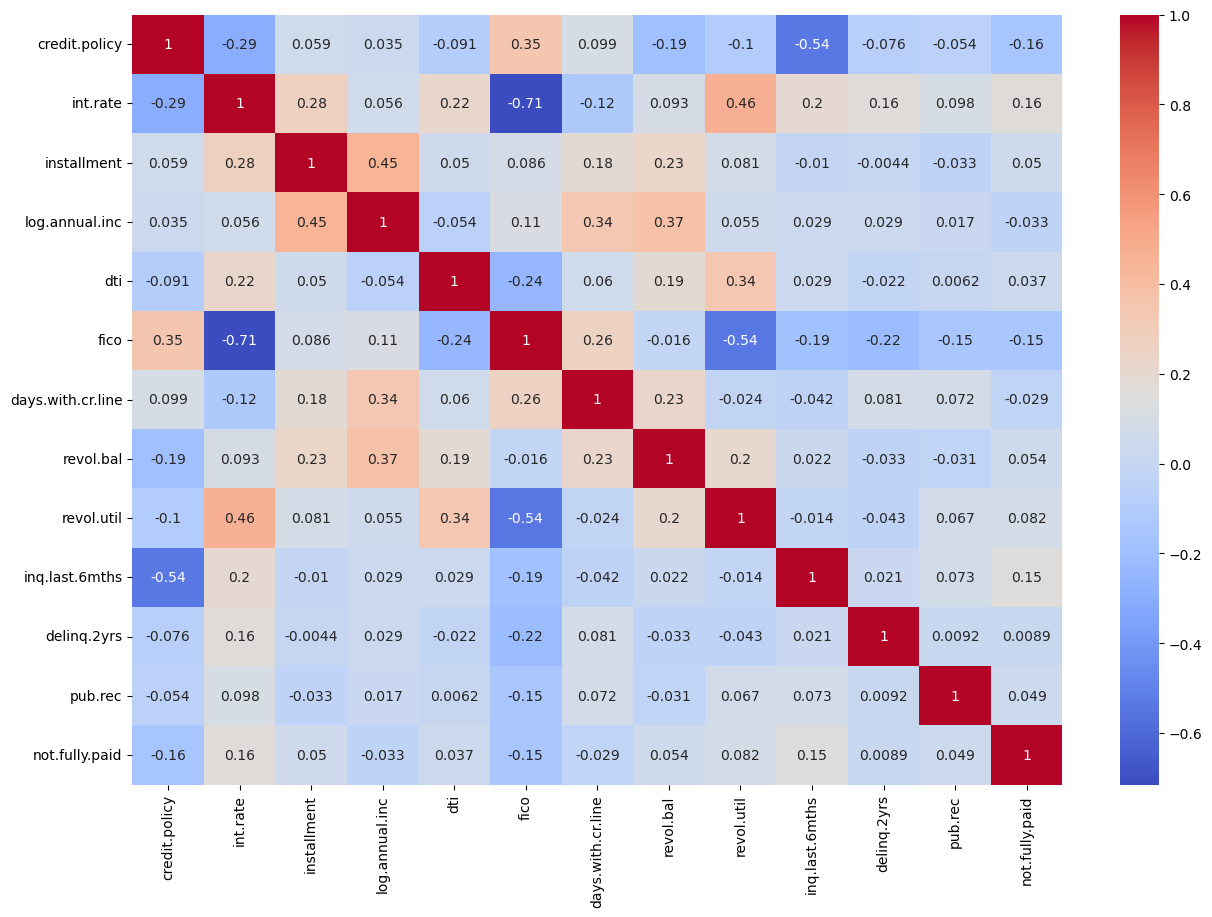

In [5]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [6]:
df1 = df.drop(['purpose'], axis =1)
df1

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [7]:
x = df1.iloc[:,0:12]
y = df1.iloc[:,-1:]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7)

In [9]:
tree_model = tree.DecisionTreeClassifier()

In [10]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred = tree_model.predict(x_test)

In [12]:
accuracy = tree_model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7421711899791231


In [13]:
print('classification_score')
print(classification_report(y_test, y_pred))

classification_score
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2418
           1       0.21      0.23      0.22       456

    accuracy                           0.74      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.75      0.74      0.75      2874



In [14]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[2026,  392],
       [ 349,  107]])

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rc = RandomForestClassifier()

In [20]:
rc.fit(x_train,y_train)

/tmp/ipykernel_13868/860868834.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rc.fit(x_train,y_train)


RandomForestClassifier()

In [21]:
y_pred1 = rc.predict(x_test)

In [22]:
accuracy1 = rc.score(x_test, y_test)
print("Accuracy:", accuracy1)

Accuracy: 0.8406402226861517


In [23]:
print('classification_score')
print(classification_report(y_test, y_pred1))

classification_score
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2418
           1       0.47      0.03      0.06       456

    accuracy                           0.84      2874
   macro avg       0.66      0.51      0.49      2874
weighted avg       0.79      0.84      0.78      2874



In [28]:
cf1 = confusion_matrix(y_test,y_pred1)
cf1

array([[2401,   17],
       [ 441,   15]])

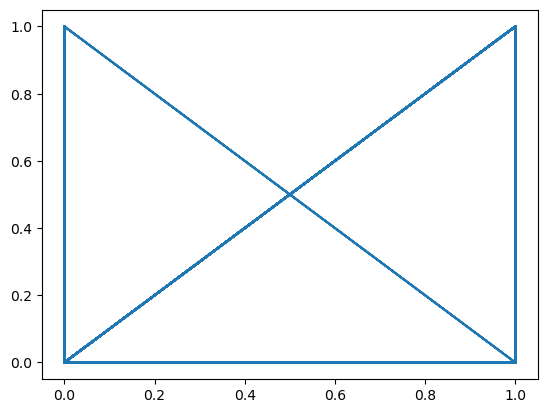

In [29]:
x = y_pred
y = y_pred1
plt.plot(x,y)

In [32]:
GB = GaussianNB()

In [33]:
GB.fit(x_train,y_train)

/home/bashar/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [38]:
y_pred2 = GB.predict(x_test)

In [39]:
accuracy2 = rc.score(x_test, y_test)
print("Accuracy:", accuracy2)

Accuracy: 0.8406402226861517


In [40]:
print('classification_score')
print(classification_report(y_test, y_pred2))

classification_score
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2418
           1       0.40      0.11      0.17       456

    accuracy                           0.83      2874
   macro avg       0.63      0.54      0.54      2874
weighted avg       0.78      0.83      0.79      2874



In [52]:
cf2 = confusion_matrix(y_test,y_pred2)
cf2

array([[2344,   74],
       [ 407,   49]])